In [1]:
import numpy as np

## download data from MD17

In [2]:
!wget http://quantum-machine.org/gdml/data/npz/ethanol_dft.npz

--2021-12-06 14:45:28--  http://quantum-machine.org/gdml/data/npz/ethanol_dft.npz
Resolving quantum-machine.org (quantum-machine.org)... 130.149.80.145
Connecting to quantum-machine.org (quantum-machine.org)|130.149.80.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229472236 (219M)
Saving to: ‘ethanol_dft.npz’

100%[======================================>] 229,472,236 13.6MB/s   in 29s    

2021-12-06 14:45:57 (7.63 MB/s) - ‘ethanol_dft.npz’ saved [229472236/229472236]



In [3]:
data=np.load('ethanol_dft.npz')

In [4]:
xyz_coordinates=data['R'][::10,:,:]

In [5]:
xyz_coordinates.shape

(55510, 9, 3)

## convert xyz coordinates to distances, which are rotation invariant

In [6]:
moleculesize=xyz_coordinates.shape[1]
pairs=[]
for i in range(moleculesize):
    for j in range(i,moleculesize):
        pairs.append([i,j])

In [7]:
distances=[]
for i, j in pairs:
    distances.append(np.linalg.norm(xyz_coordinates[:,i,:]-xyz_coordinates[:,j,:], axis=1))
distances=np.array(distances).T

In [8]:
distances.shape

(55510, 45)

## PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
pca_output=pca.fit_transform(distances)

In [11]:
pca_output.shape

(55510, 2)

In [12]:
print(pca.explained_variance_ratio_)

[0.31849739 0.2334854 ]


In [13]:
print(pca.singular_values_)

[191.5672528  164.02052517]


## plot PCA dimensions as free energy

In [14]:
import matplotlib.pyplot as plt

In [15]:
plt.rcParams.update({
    "text.usetex": False,
    "font.weight":"bold",
    "axes.labelweight":"bold",
    "font.size":10,
    'pdf.fonttype':'truetype',
    'figure.dpi':300
})

In [16]:
nbins=60
z,x,y = np.histogram2d(pca_output[:,0],pca_output[:,1], bins=nbins)
z[z==0]=np.nan
F=-np.log(z)
F=F-np.nanmin(F)

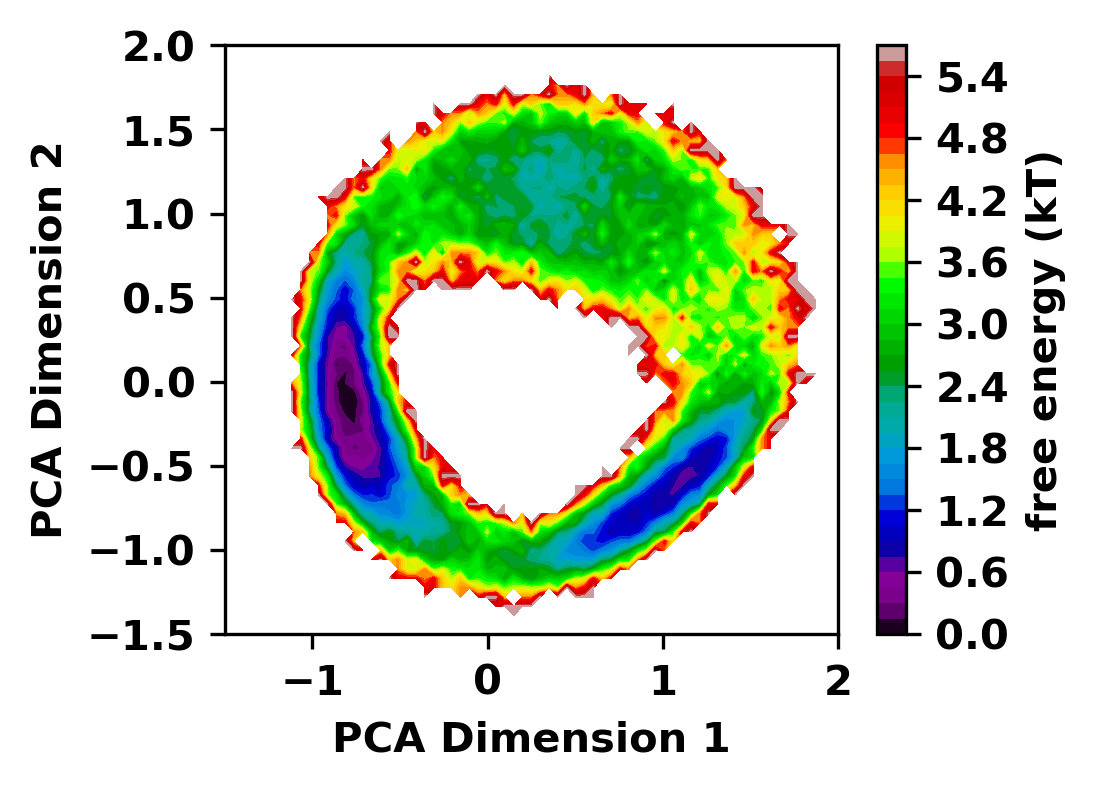

In [17]:
plt.figure(figsize=(3.3,2.6))
extent = [x[0], x[-1], y[0], y[-1]]
dX = (x[-1]-x[0])/nbins
dY = (y[-1]-y[0])/nbins
cf=plt.contourf(F.T, 50, cmap = 'nipy_spectral', extent=extent)
cbar=plt.colorbar(cf)
cbar.set_label('free energy (kT)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.xlim((-1.5,2))
plt.ylim((-1.5,2))
plt.show()

# K-means clustering

k-means performs better on low dimensional data, for example the pca-output

In [18]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=0)
kmeans_clusters=kmeans.fit_predict(pca_output[:,:10])

In [19]:
kmeans_clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

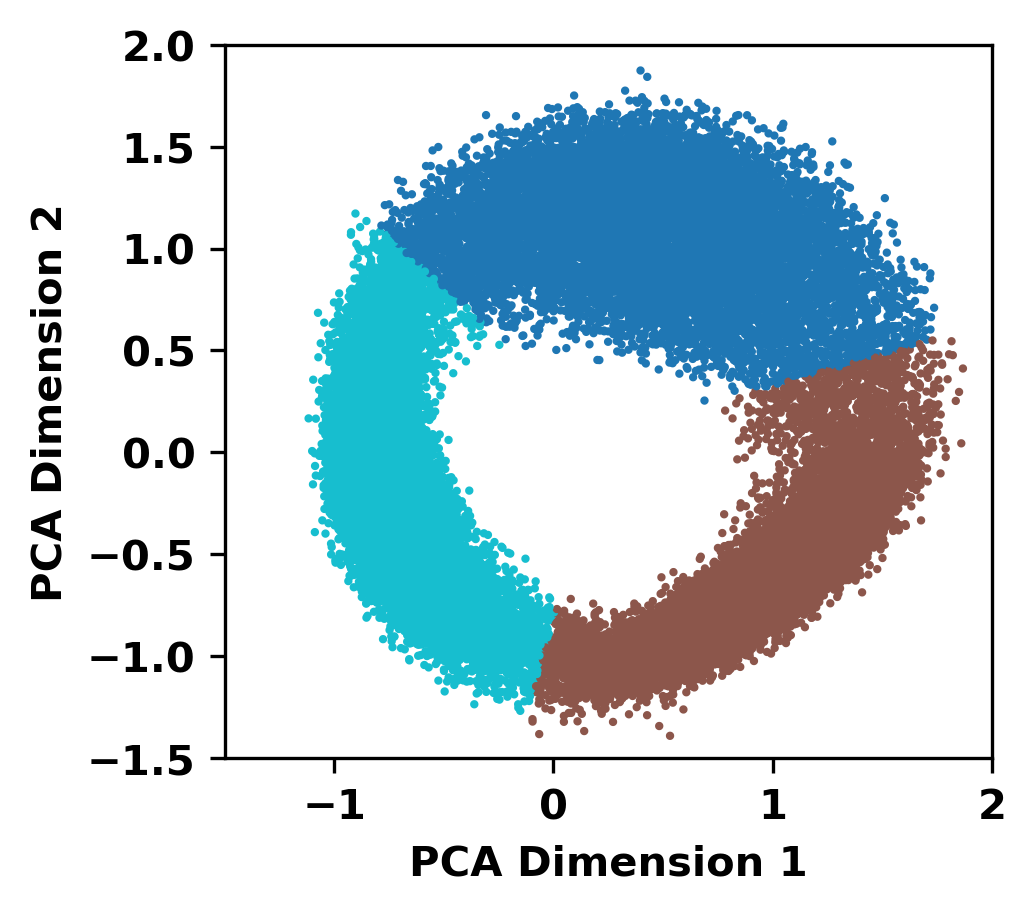

In [20]:
plt.figure(figsize=(3.3,3.15))
plt.scatter(pca_output[:,0],pca_output[:,1], c=kmeans_clusters, s=1, cmap='tab10')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.xlim((-1.5,2))
plt.ylim((-1.5,2))
plt.show()